In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#checking library versions
print("Numpy -> " + np.__version__)
print("Pandas -> " + pd.__version__)
print("Tensorflow -> " + tf.__version__)
print("Keras -> " + keras.__version__)

Numpy -> 1.20.1
Pandas -> 1.2.4
Tensorflow -> 2.3.0
Keras -> 2.4.0


In [2]:
cwd = os.getcwd()
cwd

'F:\\BIAI\\DriveAI'

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [6]:
def jaccard_distance_loss(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

In [7]:
def load_images(name, path):
    img = Image.open(path + "/" + name)
    img = np.array(img)
    seg = img[:256, 256:]
    img = img[:256, 0:256]
    
    #return img, seg
    return img/255, seg/255

In [8]:
def create_dataset(train_path, test_path):
    train_img_dataset = []
    train_seg_dataset = []
    valid_img_dataset = []
    valid_seg_dataset = []
    #train dataset - 2975
    files = os.listdir(train_path)[0:2975]
    for file in files:
        X, y = load_images(file, train_path)
        train_img_dataset.append(X)
        train_seg_dataset.append(y)
    
    #validation/test dataset - 500
    files = os.listdir(test_path)[0:500]
    for file in files:
        X, y = load_images(file, train_path)
        valid_img_dataset.append(X)
        valid_seg_dataset.append(y)
    
    return train_img_dataset, train_seg_dataset, valid_img_dataset, valid_seg_dataset

In [9]:
train_path = cwd + "/data/train"
test_path = cwd + "/data/val"


X_train, y_train, X_valid, y_valid = create_dataset(train_path, test_path)

In [10]:
X_train = np.stack([i.tolist() for i in X_train])
y_train = np.stack([i.tolist() for i in y_train])
X_valid = np.stack([i.tolist() for i in X_valid])
y_valid = np.stack([i.tolist() for i in y_valid])

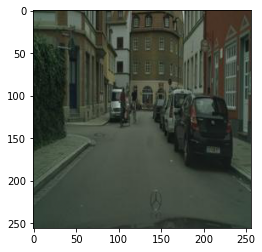

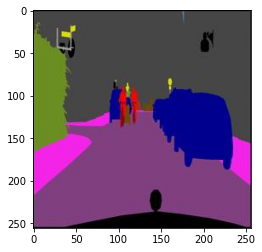

In [11]:
plt.imshow(X_train[100])
plt.show()
plt.imshow(y_train[100])
plt.show()

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=[256,256,3]),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(1024, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(1024, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(3, (1, 1), activation="sigmoid")
])

In [13]:
model.compile(optimizer="adam", loss=dice_coef_loss, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     7

In [14]:
model.load_weights('model4.h5')

In [15]:
clb = [keras.callbacks.ModelCheckpoint("model4_dice_coef_v2.h5", save_best_only=True, monitor="val_accuracy", mode="max")]
h = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), validation_steps=10, steps_per_epoch=10, callbacks=clb, verbose=2, batch_size=8)

Epoch 1/1000
10/10 - 11s - loss: 0.1001 - accuracy: 0.4846 - val_loss: 0.0860 - val_accuracy: 0.6502
Epoch 2/1000
10/10 - 11s - loss: 0.0595 - accuracy: 0.4064 - val_loss: 0.0831 - val_accuracy: 0.4834
Epoch 3/1000
10/10 - 11s - loss: 0.0383 - accuracy: 0.4815 - val_loss: 0.0606 - val_accuracy: 0.4878
Epoch 4/1000
10/10 - 11s - loss: 0.0302 - accuracy: 0.5524 - val_loss: 0.0469 - val_accuracy: 0.3862
Epoch 5/1000
10/10 - 11s - loss: 0.0261 - accuracy: 0.5467 - val_loss: 0.0429 - val_accuracy: 0.4596
Epoch 6/1000
10/10 - 11s - loss: 0.0229 - accuracy: 0.5668 - val_loss: 0.0378 - val_accuracy: 0.3918
Epoch 7/1000
10/10 - 11s - loss: 0.0223 - accuracy: 0.6083 - val_loss: 0.0321 - val_accuracy: 0.3239
Epoch 8/1000
10/10 - 11s - loss: 0.0234 - accuracy: 0.5169 - val_loss: 0.0305 - val_accuracy: 0.4380
Epoch 9/1000
10/10 - 11s - loss: 0.0208 - accuracy: 0.6315 - val_loss: 0.0306 - val_accuracy: 0.3786
Epoch 10/1000
10/10 - 11s - loss: 0.0205 - accuracy: 0.6133 - val_loss: 0.0269 - val_accura

In [16]:
model.load_weights('model4_dice_coef_v2.h5')

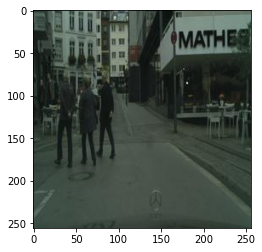

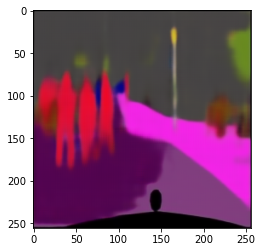

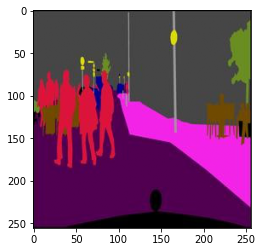

In [20]:
index = 123
x = np.stack([X_valid[index].tolist()])
pred = model.predict(x)
plt.imshow(X_valid[index])
plt.show()
predx = np.squeeze(pred)
plt.imshow(predx)
plt.show()
plt.imshow(y_valid[index])
plt.show()